In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
data=pd.read_csv("Tweets.csv")
data = data[['airline_sentiment', 'text']]

In [3]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
#set stopwords to english

stop_wr=set(stopwords.words('english'))

In [6]:
#Removing the noisy text
def noiseremoval_text(text):
  text = text.strip("@VirginAmerica")
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  return text

In [7]:
data['text']=data['text'].apply(noiseremoval_text)

In [8]:
#removing the stopwords
def removing_stopwords(text, is_lower_case=False):
    #Tokenization of text
    tokenizers=ToktokTokenizer()
    #Setting English stopwords
    tokens = tokenizers.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filter_tokens = [token for token in tokens if token not in stop_wr and not(token.isdigit())]
    else:
        filter_tokens = [token for token in tokens if token.lower() not in stop_wr and not(token.isdigit())]
    filtered_text = ' '.join(filter_tokens)    
    return filtered_text

In [9]:
data['text']=data['text'].apply(removing_stopwords)

In [10]:
data.head()

,airline_sentiment,text
0,neutral,dhepburn said
1,positive,plus youve added commercials experience tacky
2,neutral,didnt today Must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


In [11]:
#lemmatize the text
def lem(text):
  lm = WordNetLemmatizer()
  text= ' '.join([lm.lemmatize(word) for word in text.split()])
  return text

In [12]:
data['text']=data['text'].apply(lem)

In [13]:
data.head()

,airline_sentiment,text
0,neutral,dhepburn said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today Must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X = vectorizer.fit_transform(data['text'])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, data['airline_sentiment'], test_size=0.2)

In [16]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [17]:
y_pred = svm_classifier.predict(X_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'neutral',
       'negative'], dtype=object)

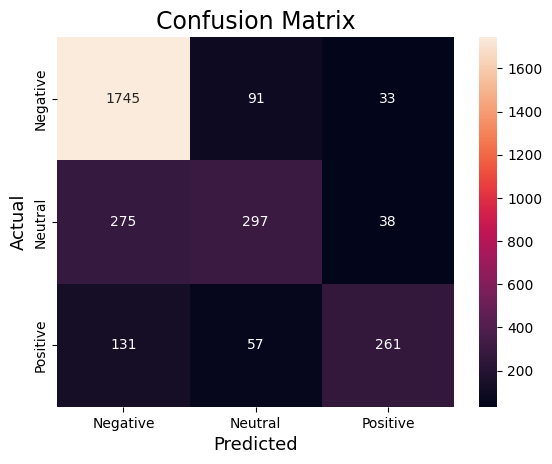

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Negative','Neutral','Positive'],
            yticklabels=['Negative','Neutral','Positive'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [19]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

    negative      0.811     0.934     0.868      1869
     neutral      0.667     0.487     0.563       610
    positive      0.786     0.581     0.668       449

    accuracy                          0.787      2928
   macro avg      0.755     0.667     0.700      2928
weighted avg      0.777     0.787     0.774      2928



In [20]:
a = input("Enter the sentence: ")
a = lem(a)
a = removing_stopwords(a)
a = [a]
a = vectorizer.transform(a)
pred = svm_classifier.predict(a)
print(pred[0])

Enter the sentence: It is a best quote
positive
